In [1]:
import sys, os
sys.path.append('/Users/michaelgentnermac/Documents/ADL4CV/video_interpolation/')
import torch
import torch.nn as nn
from backprojection.bfgs import BFGSProjector
from interpolate_latent.functions import *
from models.wgan import Generator, Discriminator
import torchvision.transforms as transforms
import pickle
import numpy as np
import matplotlib.pyplot as plt
from backprojection.criticprojector import CriticProjector

netG = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/g.pt',map_location=torch.device('cpu'))
netG = netG.double().cpu()
netD = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/d.pt', map_location=torch.device('cpu'))
netD = netD.double().cpu()

netG = netG.eval()
netD = netD.eval()

In [2]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
toPil = transforms.ToPILImage()

In [4]:
c_projector = CriticProjector(netG, netD, torch.device('cpu'))
latent_vectors = pickle.load(open('/Users/michaelgentnermac/Documents/ADL4CV/final_models/latent_video_framerate_upsampling_linear_d_corrected.pkl', 'rb'))

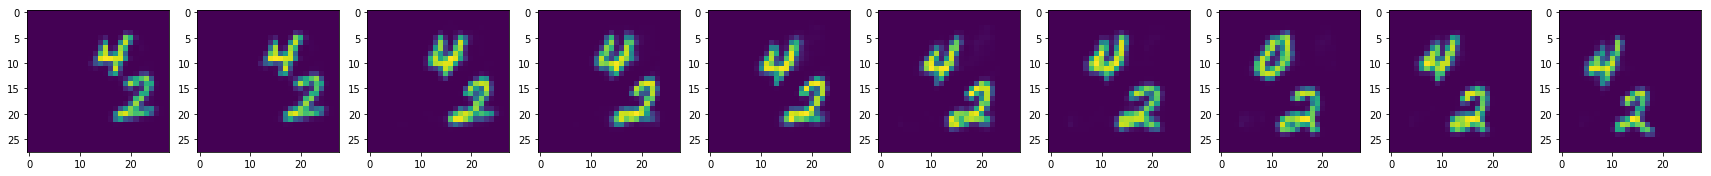

In [6]:
fig = plt.figure(figsize=(30, 10))

for i, vec in enumerate(latent_vectors):
    
    fig.add_subplot(1, len(latent_vectors), i+1)
    img = netG(torch.tensor(vec)).detach().numpy().squeeze()
    plt.imshow(img)
plt.show()

In [7]:
path = '/Users/michaelgentnermac/Documents/ADL4CV/results/interpolation_linear/'

In [8]:
for i, vec in enumerate(latent_vectors):
    
    img = netG(torch.tensor(vec)).detach().squeeze()
    toPil(img.squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')